In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import pathlib 
import os

In [3]:
bs = 16

In [4]:
path = pathlib.Path().absolute(); path

PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1')

In [5]:
(path/'train').ls()

[PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/rock'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/metal'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/pop'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/disco'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/country'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/.ipynb_checkpoints'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/hiphop'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/blues'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/reggae'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/jazz'),
 PosixPath('/home/kdduan/Documents/Classes/Personal/fastai/lesson1/train/classical')]

In [6]:
tfms = get_transforms(do_flip=False, max_rotate=0, max_zoom=0, max_lighting=0, max_warp=0)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=376, bs=bs)

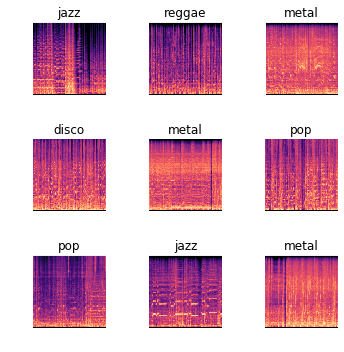

In [7]:
data.show_batch(rows=3, figsize=(5,5))

In [8]:
print(data.classes)
len(data.classes), data.c

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


(10, 10)

### Train ResNet

In [9]:
model = cnn_learner(data, models.resnet18, metrics=error_rate)

In [10]:
model.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.301672,2.832919,0.960000,00:53
1,2.482411,1.919997,0.560000,00:53
2,1.838069,1.364802,0.420000,00:52
3,1.412630,1.453374,0.360000,00:52
4,1.091374,1.132993,0.340000,00:52
5,0.874213,1.015785,0.340000,00:52
6,0.705062,0.934137,0.320000,00:52
7,0.599169,0.912055,0.360000,00:53
8,0.518495,0.884141,0.320000,00:52
9,0.461719,0.891312,0.360000,00:52


In [11]:
model.save('version1')

In [13]:
interp = ClassificationInterpretation.from_learner(model)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

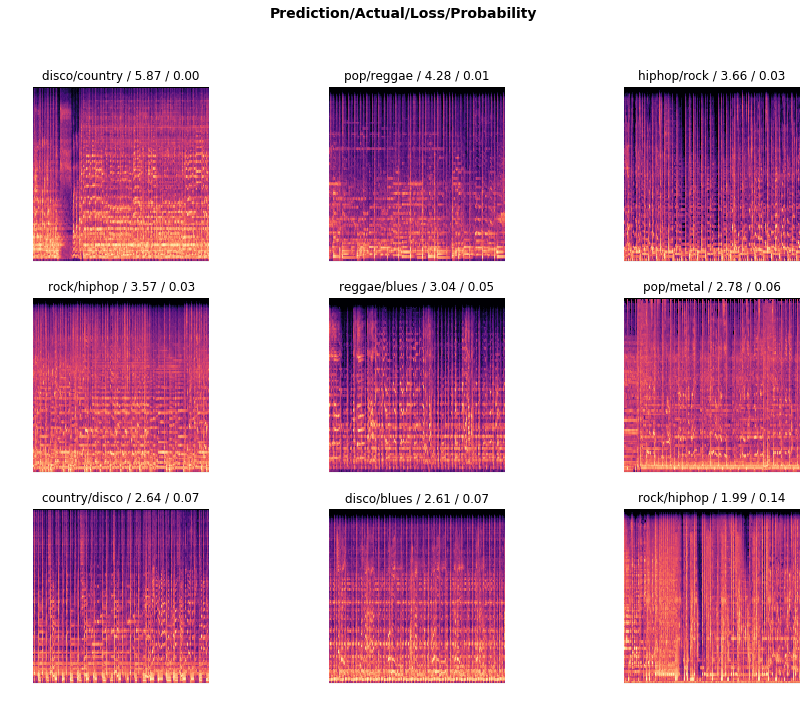

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

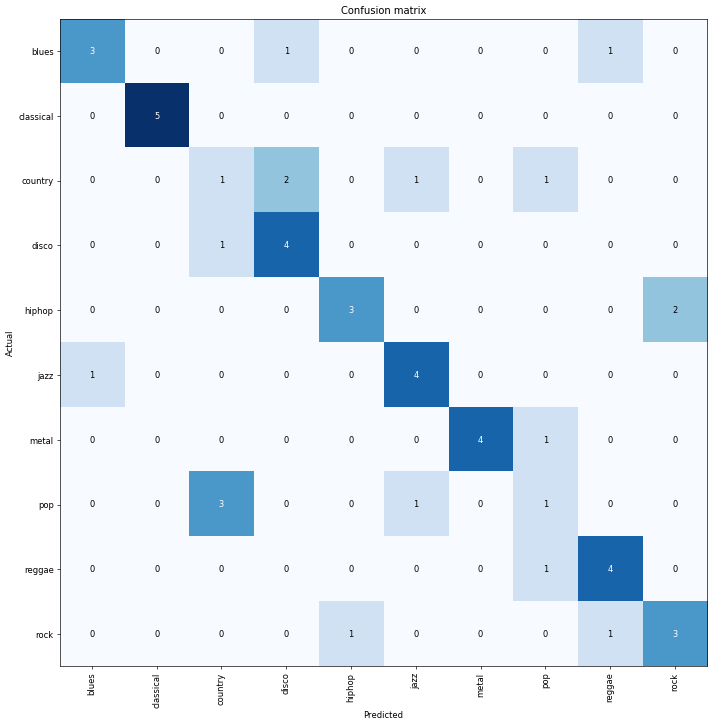

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('pop', 'country', 3), ('country', 'disco', 2), ('hiphop', 'rock', 2)]

In [17]:
model.load('version1')

Learner(data=ImageDataBunch;

Train: LabelList (200 items)
x: ImageList
Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376)
y: CategoryList
rock,rock,rock,rock,rock
Path: /home/kdduan/Documents/Classes/Personal/fastai/lesson1;

Valid: LabelList (50 items)
x: ImageList
Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376),Image (3, 376, 376)
y: CategoryList
rock,rock,rock,rock,rock
Path: /home/kdduan/Documents/Classes/Personal/fastai/lesson1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [18]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 